## Analysis

In this notebook I analyse my findings. The portfolio, profile and transcript (initially transcript_offer_customer) dataframes contain aggregated and calculated data from the initial datasets. Each dataset poses it's own set of questions

In [263]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# read processed data
engine = create_engine('sqlite:///./Portfolio.db')
portfolio = pd.read_sql_table('Portfolio', engine)

engine = create_engine('sqlite:///./Profile.db')
profile = pd.read_sql_table('Profile', engine)

engine = create_engine('sqlite:///./OfferPerson.db')
transcript = pd.read_sql_table('OfferPerson', engine)

## Profile

In [264]:
# quick look at the processed profile data
profile

,gender,age,customer_id,income,time_loyalty,total_spend,total_experiment_time,total_received,total_viewed,total_completed
0,F,1,0610b486422d4921ae7d2bf64640c50b,112000.0,1.0,77,528,2,0,0
1,F,2,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1.0,159,582,4,4,3
2,M,2,e2127556f4f64592b11af22de27a7932,70000.0,2.0,57,522,4,3,2
3,M,2,389bc3fa690240e798340f5a15918d5c,53000.0,2.0,36,600,6,6,4
4,M,1,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2.0,15,570,3,2,1
...,...,...,...,...,...,...,...,...,...,...
14601,F,1,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2.0,20,690,3,3,0
14602,M,2,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2.0,25,654,3,1,0
14603,M,1,01d26f638c274aa0b965d24cefe3183f,73000.0,1.0,39,672,3,1,1
14604,F,2,9dc1421481194dcd9400aec7c9ae6366,50000.0,1.0,189,684,3,3,1


### What is the distribution of gender in the Starbucks' user base?

Predominantly, about 20% more as the second place, comes the male audience followed by other genders.

<AxesSubplot:>

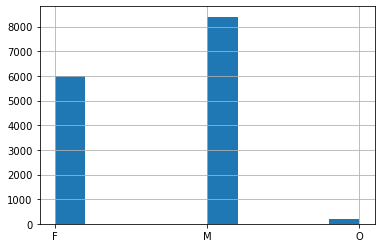

In [265]:
# frequency of each gender type in the dataset
# Clearly we can see, though not by much that males are predominant in the dataset. The minority falls back to 'other' genders
profile.gender.hist()

<AxesSubplot:ylabel='Frequency'>

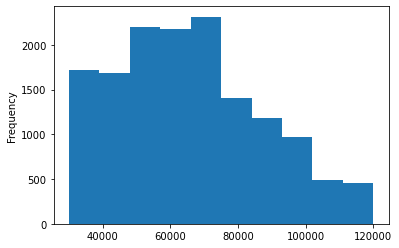

In [266]:
# The dataset income is pretty well distributed so we cannot draw any conclusions from it
profile.income.plot.hist()

<AxesSubplot:ylabel='Frequency'>

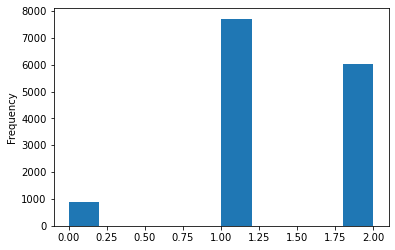

In [267]:
# 18-24 - young - 0
# 25 - 59 - adult - 1
# 60-90 - elder - 2
# Here we can see that the majority of our customers is split almost in half between adults and elders, not many young customers
profile.age.plot.hist()

In [268]:
# convert total spend into groups
def convert_total_spend(x):
    if type(x) != str:
        if x <= 10:
            return '0-10'
        if 10 <= x <= 25:
            return '15-25'
        if 25 <= x <= 50:
            return '25-50'
        if 50 <= x <= 100:
            return '50-100'
        if 100 <= x <= 150:
            return '100-150'
        if 150 <= x <= 200:
            return '150-200'
        if 200 <= x <= 300:
            return '200-300'
        if 300 <= x <= 400:
            return '300-400'
        if 400 <= x <= 500:
            return '400-500'
        if x >= 500:
            return '>500'
    return x

profile.total_spend = profile.total_spend.apply(lambda x: convert_total_spend(x))

### What is the predominant average spend value?

For this, I grouped the spend into a couple of categories. The majority of users spend from 15 to 200 USD. The rest spend less than 10 USD or more than 200

<AxesSubplot:>

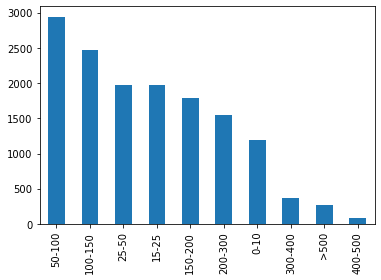

In [269]:
# The majority of users spend from 15 to 200 USD. The rest spend less than 10 USD or more than 200 USD.
profile.total_spend.value_counts().plot.bar()

### What is the median value for each gender's income?

Median value for 'others' gender floats around 60.000 USD

Median value for 'female' gender floats around 70.000 USD

Median value for 'male' gender floats around 60.000 USD

([<matplotlib.axis.XTick at 0x7f9884e55d00>,
 [Text(1, 0, 'O'), Text(2, 0, 'F'), Text(3, 0, 'M')])

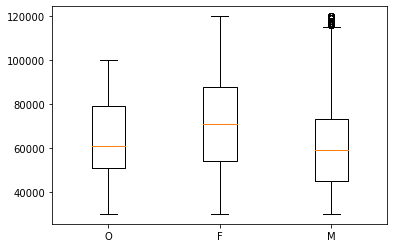

In [270]:
# The median income is balanced between genders. Median value is between 60.000 USD and 70.000 USD
income_O = profile[profile.gender == 'O'].income
income_F = profile[profile.gender == 'F'].income
income_M = profile[profile.gender == 'M'].income
labels = ('O', 'F', 'M')
plt.boxplot ([income_O, income_F, income_M])
plt.xticks(np.arange(len(labels))+1,labels)

## Portfolio

### What offer has the highest conversion rate?

The 4 days duration discount offer with a difficulty of 10 and reward of 2.

In [271]:
# Both discount offers take the lead in the conversion rate metric. On the third place we have a bogo offer
portfolio.sort_values(by='conversion_rate', ascending=False)[['reward', 'difficulty', 'duration', 'offer_type', 'conversion_rate']]

,reward,difficulty,duration,offer_type,conversion_rate
6,2,10,240,discount,0.214390
5,3,7,168,discount,0.187661
3,5,5,120,bogo,0.165794
9,0,0,72,informational,0.158756
1,10,10,120,bogo,0.127417
0,10,10,168,bogo,0.127210
7,2,10,168,discount,0.106766
8,0,0,96,informational,0.100423
2,5,5,168,bogo,0.096928
4,5,20,240,discount,0.071727


### What offer has the highest click-through rate?

We got the same offer, the 4 days duration discount offer with a difficulty of 10 and reward of 2.

In [272]:
# as the top 4 offers coming close at 96% click-through rate we have two bogo and discount offers and one informational
# last place is taken by a discount offer, specifically  the one with high difficulty
portfolio.sort_values(by='click_through', ascending=False)[['reward', 'difficulty', 'duration', 'offer_type', 'click_through']]

,reward,difficulty,duration,offer_type,click_through
6,2,10,240,discount,0.969791
3,5,5,120,bogo,0.968598
1,10,10,120,bogo,0.967593
5,3,7,168,discount,0.966667
9,0,0,72,informational,0.904341
0,10,10,168,bogo,0.898670
2,5,5,168,bogo,0.558522
7,2,10,168,discount,0.556812
8,0,0,96,informational,0.553614
4,5,20,240,discount,0.358453


### What are the most profitable offers (highest ROI)?

In [273]:
# what are the most profitable offers? sort by total_roi
print("The offers with the best roi are:")
best_roi_offer = portfolio.sort_values(by="total_roi", ascending=False)
best_roi_offer[['reward', 'difficulty', 'duration', 'offer_type', 'total_roi']]

The offers with the best roi are:


,reward,difficulty,duration,offer_type,total_roi
6,2,10,240,discount,6.007619
7,2,10,168,discount,3.752929
5,3,7,168,discount,3.006910
3,5,5,120,bogo,1.760258
4,5,20,240,discount,0.970048
1,10,10,120,bogo,0.732522
2,5,5,168,bogo,0.514182
0,10,10,168,bogo,0.459522
8,0,0,96,informational,0.000000
9,0,0,72,informational,0.000000


## Transcript

In [274]:
# first look at the transcript
transcript

,customer_id,offer_id,offer_completed_reward,revenue_generated,offer_successful,viewed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,2.0,0,False,False
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0.0,8,True,True
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,0.0,22,True,True
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0,False,False
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,2.0,0,False,False
...,...,...,...,...,...,...
54398,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,10.0,6,True,True
54399,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,22,True,True
54400,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,6.0,15,True,True
54401,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,0,False,False


### What gender gives the best ROI?

In [275]:
# group dataset by customer id, sum it's values and merge each customer's demographic traits
profile = profile.set_index('customer_id')
transcript_person = transcript.groupby('customer_id').sum()
transcript_person = pd.concat([transcript_person, profile], axis=1) # .drop(['converted_users', 'fail_users', 'success_users'], axis=1)
transcript_person

,offer_completed_reward,revenue_generated,offer_successful,viewed,gender,age,income,time_loyalty,total_spend,total_experiment_time,total_received,total_viewed,total_completed
customer_id,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,9.0,30.0,2.0,2.0,M,1,72000.0,1.0,100-150,696,5,4,2
0011e0d4e6b944f998e987f904e8c1e5,13.0,33.0,3.0,3.0,O,1,57000.0,2.0,50-100,654,5,5,3
0020c2b971eb4e9188eac86d93036a77,14.0,81.0,3.0,3.0,F,2,90000.0,1.0,150-200,708,5,3,3
0020ccbbb6d84e358d3414a3ff76cffd,13.0,93.0,4.0,4.0,F,0,60000.0,1.0,150-200,672,4,4,4
003d66b6608740288d6cc97a6903f4f0,9.0,16.0,3.0,3.0,F,1,73000.0,1.0,25-50,696,5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff82501cea40309d5fdd7edcca4a07,18.0,53.0,3.0,3.0,F,1,62000.0,1.0,200-300,648,6,6,3
c6e579c6821c41d1a7a6a9cf936e91bb,NaN,NaN,NaN,NaN,F,2,35000.0,2.0,0-10,570,0,0,0
eb540099db834cf59001f83a4561aef3,NaN,NaN,NaN,NaN,F,2,34000.0,2.0,25-50,594,0,0,0


In [276]:
roi_M = (np.sum(transcript_person[transcript_person.gender == 'M'].revenue_generated) - np.sum(transcript_person[transcript_person.gender == 'M'].offer_completed_reward)) / np.sum(transcript_person[transcript_person.gender == 'M'].offer_completed_reward)
roi_M

roi_O = (np.sum(transcript_person[transcript_person.gender == 'O'].revenue_generated) - np.sum(transcript_person[transcript_person.gender == 'O'].offer_completed_reward)) / np.sum(transcript_person[transcript_person.gender == 'O'].offer_completed_reward)
roi_O

roi_F = (np.sum(transcript_person[transcript_person.gender == 'F'].revenue_generated) - np.sum(transcript_person[transcript_person.gender == 'F'].offer_completed_reward)) / np.sum(transcript_person[transcript_person.gender == 'F'].offer_completed_reward)

roi_list = [['O', roi_O], ['F', roi_F], ['M', roi_M]]

df_roi = pd.DataFrame(roi_list, columns = ['gender', 'roi'])

df_roi.sort_values(by='roi', ascending=False).set_index('gender')

,roi
gender,
O,2.570968
F,2.263656
M,2.214758
